<a href="https://colab.research.google.com/github/SergeyS1954/LW_TR/blob/main/LW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа № 4


## Бездефицитная схема ремонта

Рассмотрим случай, когда количество ремонтников гарантирует, что при каждом отказе элемента найдется свободный ремонтник,  который немедленно начинает процесс восстановления ($M = N$).

Параметры процесса размножения-гибели для данного случая:
$$
		\lambda_k  =  (N - k)\lambda,  k = 0,1, \dots, N-1,   
$$
		и
$$
	\mu_k  =    k \mu, \ k = 1,2,  \dots, N.  
$$
В данном случае формулы стационарных вероятностей преобразуются к виду:
$$
  \pi_k = \binom{N}{k}\rho^k \pi_0, \ \  k = 0,1, \dots, N.  
$$

Из условий нормировки
$$
\pi_0 = \left( \sum_{k=0}^{N} \binom{N}{k}\rho^k \right)^{-1}  = \frac{1}{(1 + \rho)^N}.  
$$

Проиллюстрируем бездефицитную схему ремонта для случая $N = 2,3,4$.

Построим графики стационарных вероятностей  нахождения в ремонте всех элементов системы.


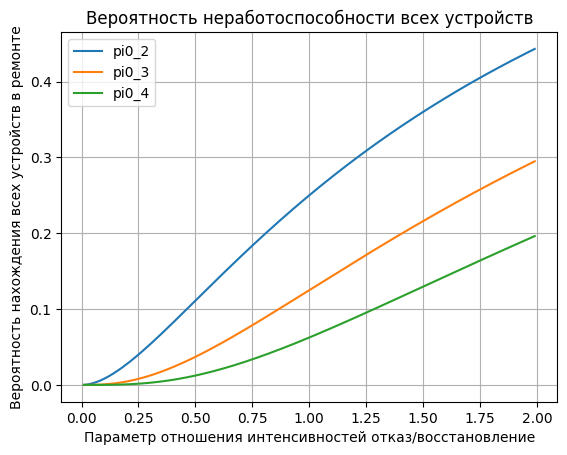

In [1]:
import matplotlib.pyplot as plt
import numpy as np
ro = np.arange (0.01, 2.0, 0.01)
pi2_2 = (ro/(1 + ro))**2
pi3_3 =  (ro/(1 + ro))**3
pi4_4 =  (ro/(1 + ro))**4
plt.plot(ro,pi2_2,label = 'pi0_2')
plt.plot(ro,pi3_3,label = 'pi0_3')
plt.plot(ro,pi4_4,label = 'pi0_4')
plt.title('Вероятность неработоспособности всех устройств')
plt.xlabel('Параметр отношения интенсивностей отказ/восстановление')
plt.ylabel('Вероятность нахождения всех устройств в ремонте')
plt.legend()
plt.grid(True)
plt.show()

С практической точки зрения общая формула для вероятностей состояний системы достаточно сложна, чтобы ей оперировать для обоснования управленческих решений.

Поэтому во многих практических ситуациях целесообразно оценить диапазон изменения операционной характеристики при изменении числа устройств восстановления $M$ между предельными значениями.


В качестве иллюстрации обсуждаемого подхода рассмотрим задачу для $N=3$.
Имеется три устройства. Выполним расчет для вероятности неработоспособности всех устройств при различном числе ремонтников.

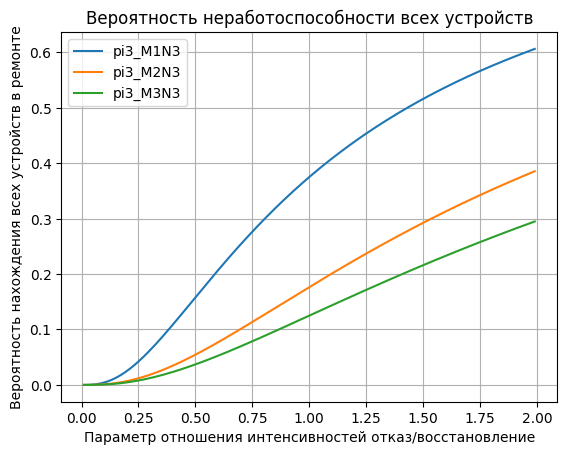

In [2]:
import matplotlib.pyplot as plt
import numpy as np
ro = np.arange (0.01, 2.0, 0.01)
pi0_M1N3 = 1/(1 + 3*ro + 6*ro**2 + 6*ro**3)
pi0_M2N3 = 1/(1 + 3*ro + 3*ro**2 + (3/2)*ro**3)
pi0_M3N3 = 1/((1 + ro)**3)
pi3_M1N3 = (6*ro**3)*pi0_M1N3
pi3_M2N3 = ((3/2)*ro**3)*pi0_M2N3
pi3_M3N3 = (ro**3)*pi0_M3N3
plt.plot(ro,pi3_M1N3,label = 'pi3_M1N3')
plt.plot(ro,pi3_M2N3,label = 'pi3_M2N3')
plt.plot(ro,pi3_M3N3,label = 'pi3_M3N3')
plt.title('Вероятность неработоспособности всех устройств')   # заголовок
plt.xlabel('Параметр отношения интенсивностей отказ/восстановление')   # подпись оси OX
plt.ylabel('Вероятность нахождения всех устройств в ремонте')
plt.legend()
plt.grid(True)
plt.show()

## Среднее время безотказной работы для дублирования с восстановлением

Рассмотрим систему $\Sigma$, состоящую из двух элементов $\sigma_1$ и $\sigma_2$. В момент $t = 0$ начинает работать элемент $\sigma_1$ и работает до момента отказа $t = t_1$, после чего сразу начинает работать элемент  $\sigma_2$, а элемент $\sigma_1$ начинает восстанавливаться.  

Обозначим время работы элемента $\sigma_2$ через $t_2$, длительность восстановления элемента $\sigma_1$ --- через $t_1'$.

Если $t_1' > t_2$, то в момент $t = t_1 + t_2$ система отказывает; в противном случае в момент  $t = t_1 + t_2$ снова начинает работать первый элемент и т. д.

Операционная характеристика --- среднее время работы системы $\bar{T}$.

Для случая экспоненциально распределенных периодов работы (с параметром $\lambda$) и произвольных функций распределения времени восстановления $R$ доказано, что среднее значения времени безотказной работы $\bar{T}$ системы $\Sigma$ определяется как:

$$
\bar{T}  = \frac{1}{\lambda} \left( 1 + \frac{1}{1 - \int_{0}^{\infty}\exp(-\lambda t)dR(t)}\right).
$$

В частности, если функция восстановления --- экспоненциальная с параметром $\mu$ формула трансформируется в
$$
\bar T  = \frac{1}{\lambda} \left( 2 + \frac{\mu}{\lambda}\right).
$$


В случае отсутствия информации о конкретном виде функции распределения времени восстановления $R(t)$ можно воспользоваться неравенствами, которые выполняются для определенных классов функций $R(t)$.

В частности, если известно, что функция  $R(t)$ с математическим ожиданием $m_R$ относится к классу **НЛСС**, то справедлива оценка:

$$
\frac{1}{\lambda} \left( 1 + \frac{1}{1 - \exp(-\lambda  m_R)}\right) \leq \bar T  \leq \frac{1}{\lambda} \left( 1 + \frac{1}{1 - \frac{1}{1+ \lambda m_R}}\right).
$$

Двойное неравенство позволяет формулировать содержательные суждения о возможных ошибках определения среднего времени жизни системы рассматриваемого типа, связанных с неполным знанием истинного вида функции распределения времени восстановления. Рассмотрим графики нижней ($T_l$) и верхней ($T_u$) границ среднего времени жизни системы ($\lambda$ = 1,2,3, $m_R$ изменется от 0.05 до 1.0).

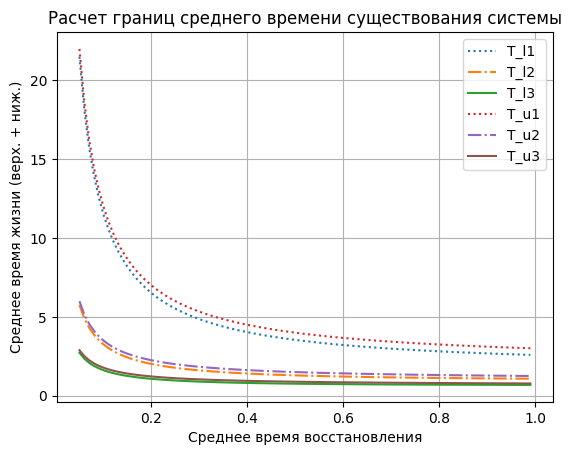

In [5]:
import numpy as np
import matplotlib.pyplot as plt
lam = 1
mr = np.arange (0.05, 1.0, 0.01)
T_l1  = 1/lam *(1 + 1/(1 - np.exp(-lam*mr)))
T_l2  = (1/2*lam) *(1 + 1/(1 - np.exp(-2*lam*mr)))
T_l3  = (1/3*lam) *(1 + 1/(1 - np.exp(-3*lam*mr)))
fig = plt.figure()   # Отрисовка данных
plt.plot (mr,T_l1, linestyle=":", label = 'T_l1')
plt.plot (mr,T_l2, linestyle="-.", label = 'T_l2')
plt.plot (mr,T_l3, label = 'T_l3')
T_r1  = 1/lam *(2 + 1/(lam*mr))
T_r2  = (1/2*lam) *(2 + 1/(2*lam*mr))
T_r3  = (1/3*lam) *(2 + 1/(3*lam*mr))
plt.plot (mr,T_r1, linestyle=":", label = 'T_u1')
plt.plot (mr,T_r2, linestyle="-.", label = 'T_u2')
plt.plot (mr,T_r3, label = 'T_u3')
plt.title('Расчет границ среднего времени существования системы')
plt.xlabel('Среднее время восстановления')
plt.ylabel('Среднее время жизни (верх. + ниж.)')
plt.legend()
plt.grid(True)
plt.show()

Близость границ позволяет предположить, что в данном случае вид функции распределения не является существенным фактором. Действительно, отношение нижней к верхней границе не меньше, чем 0,85.

Значит, ошибка, связанная с незнанием истинной функции распределения времени восстановления, и, следовательно, неточным определением среднего времени жизни системы не может превысить 15\%. Приведенный график иллюстрирует изложенную идею.


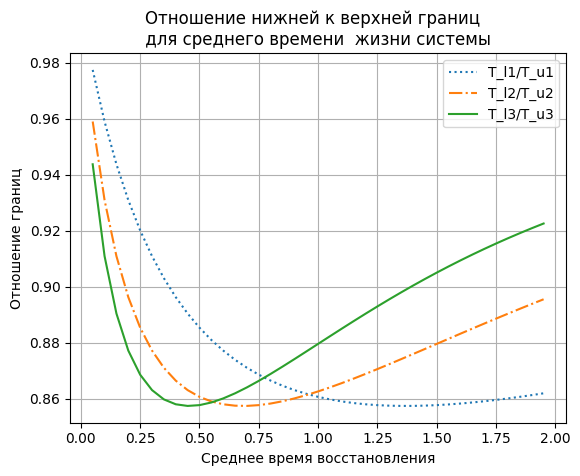

In [9]:
import numpy as np
import matplotlib.pyplot as plt
mr = np.arange (0.05, 2.0, 0.05)
T_l1  = 1/lam *(1 + 1/(1 - np.exp(-lam*mr)))
T_l2  = (1/2*lam) *(1 + 1/(1 - np.exp(-2*lam*mr)))
T_l3  = (1/3*lam) *(1 + 1/(1 - np.exp(-3*lam*mr)))
T_r1  = 1/lam *(2 + 1/(lam*mr))
T_r2  = (1/2*lam) *(2 + 1/(2*lam*mr))
T_r3  = (1/3*lam) *(2 + 1/(3*lam*mr))
plt.plot (mr,T_l1/T_r1, linestyle=":", label = 'T_l1/T_u1')
plt.plot (mr,T_l2/T_r2, linestyle="-.", label = 'T_l2/T_u2')
plt.plot (mr,T_l3/T_r3, label = 'T_l3/T_u3')
plt.title('Отношение нижней к верхней границ  \n для среднего времени  жизни системы ')
plt.xlabel('Среднее время восстановления')
plt.ylabel('Отношение границ')
plt.legend()
plt.grid(True)
plt.show()

# Точечное и интервальное оценивание параметров моделей надежности

Оценивание параметров случайных величин --- необходимая часть построения моделей теории надежности при анализе систем различной природы.

Если оценка параметра дается как  одно число, т. е. точкой на числовой прямой, то такая оценка называется *точечной*.

Информация о точности такой оценки или вероятностных характеристик степени доверия к ней может отсутствовать.

Оценки вероятностных параметров, состоящие в указании границ интервала, в котором с вероятностью не меньше заданной, попадает неизвестное значение оцениваемого параметра, называются *интервальными*.


## Интервальная оценка параметра надежности


*Доверительным интервалом* числовой характеристики или параметра $\theta$ называется интервал $(\theta_1, \theta_2$ со случайными границами, для которого выполняется:

$$
\mathbb P(\theta_1 < \theta <\theta_2) = \gamma.
$$

Величина $\gamma$ называется доверительной вероятностью оценки.

*Доверительная вероятность* оценки --- это вероятность, с которой истинное (неизвестное) значение математического ожидания (или иной характеристики)  случайной величины попадет в доверительный интервал.

Часто вместо доверительной вероятности $\gamma$  рассматривается вероятность

$$\alpha = 1 - \gamma,$$
которая называется  *уровнем значимости*.

Доверительный интервал для параметра $\theta$  не является единственным и различные методы по разному строят границы приводят к различным значениям $\theta_1$ и $\theta_2$.

Более того, для каждой конкретной выборки получаются отличающиеся друг от друга границы доверительных интервалов.

Обычно доверительный интервал $(\theta_1, \theta_2)$ строят симметричным так, чтобы дополняющие интервалы $(-\infty, \theta_1)$ и $(\theta_2,+\infty)$ накрывали $\theta$ равновероятно (с вероятностью $\alpha/2$).